<a href="https://colab.research.google.com/github/sb2011483/ITB2022/blob/main/sb_assignment2_bmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###목표: bmi에 따른 비만 여부를 판단하는데 중요한 지표가 될 특성을 확인하고 이를 예측할 수 있는 모델을 구현한다.

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/python/health_data2.csv",encoding='CP949')
print(health.shape)
health.head()

(10000, 29)


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,bmi,bmi에 따른 비만도
0,2020,1,36,1,9,165,60,72.1,127.0,79.0,...,27.0,21.0,1.0,0.0,0,NaN,NaN,12/29/21,22.038567,정상
1,2020,2,27,2,13,150,65,81.0,110.0,73.0,...,15.0,15.0,1.0,0.0,0,NaN,NaN,12/29/21,28.888889,비만
2,2020,3,11,2,12,155,55,70.0,123.0,80.0,...,25.0,7.0,1.0,0.0,0,NaN,NaN,12/29/21,22.892820,정상
3,2020,4,31,1,13,160,70,90.8,134.0,84.0,...,97.0,72.0,1.0,0.0,1,0.0,0.0,12/29/21,27.343750,비만
4,2020,5,41,2,12,155,50,75.2,144.0,89.0,...,17.0,14.0,1.0,0.0,0,NaN,NaN,12/29/21,20.811655,정상


In [ ]:
health = health.drop(columns=['구강검진수검여부','치아우식증유무','치석','기준년도','신장(5Cm단위)','체중(5Kg 단위)','bmi'])

In [ ]:
health

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,데이터공개일자,bmi에 따른 비만도
0,1,36,1,9,72.1,127.0,79.0,90.0,188.0,58.0,...,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,12/29/21,정상
1,2,27,2,13,81.0,110.0,73.0,87.0,NaN,NaN,...,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,12/29/21,비만
2,3,11,2,12,70.0,123.0,80.0,102.0,NaN,NaN,...,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,12/29/21,정상
3,4,31,1,13,90.8,134.0,84.0,146.0,NaN,NaN,...,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,12/29/21,비만
4,5,41,2,12,75.2,144.0,89.0,110.0,220.0,171.0,...,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,12/29/21,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,2,13,83.0,120.0,75.0,120.0,NaN,NaN,...,13.7,1.0,0.7,20.0,21.0,20.0,1.0,1.0,12/29/21,정상
9996,9997,43,2,11,77.5,132.0,79.0,117.0,NaN,NaN,...,14.3,1.0,0.7,24.0,22.0,21.0,1.0,1.0,12/29/21,정상
9997,9998,45,1,12,93.0,116.0,75.0,86.0,NaN,NaN,...,15.6,1.0,1.0,22.0,27.0,35.0,1.0,0.0,12/29/21,비만
9998,9999,27,2,15,78.0,117.0,71.0,118.0,NaN,NaN,...,13.5,NaN,1.0,26.0,24.0,21.0,1.0,0.0,12/29/21,정상


In [ ]:
health2 = health.dropna()

In [ ]:
health2['Target'] = health2['bmi에 따른 비만도'].replace({'저체중':0,'정상':1,'과체중':2,'비만':3})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- 설명변수 및 목표변수 설정

In [ ]:
X= pd.get_dummies(health2.drop(columns=['bmi에 따른 비만도','Target']))
X1 = pd.get_dummies(X)
X1

Y= health2['Target']

In [ ]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,데이터공개일자_12/29/21
0,1,36,1,9,72.1,127.0,79.0,90.0,188.0,58.0,...,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,1
4,5,41,2,12,75.2,144.0,89.0,110.0,220.0,171.0,...,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,1
5,6,27,1,9,94.0,114.0,72.0,86.0,234.0,183.0,...,147.0,16.4,1.0,1.1,25.0,32.0,26.0,1.0,1.0,1
6,7,44,1,9,93.0,112.0,73.0,250.0,119.0,265.0,...,40.0,15.7,1.0,0.7,18.0,20.0,35.0,1.0,1.0,1
8,9,41,2,17,82.0,136.0,65.0,104.0,177.0,61.0,...,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0,1


1    1471
3    1420
2     923
0     141
Name: Target, dtype: int64


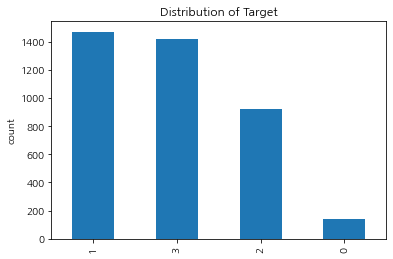

In [ ]:
print(health2['Target'].value_counts())

health2['Target'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of Target')
plt.show()

-> bmi에 따른 비만도 비율 확인

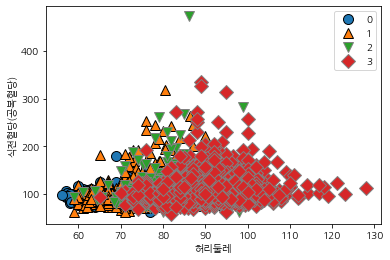

In [ ]:
mglearn.discrete_scatter(health2['허리둘레'], health2['식전혈당(공복혈당)'], health2['Target'])
plt.xlabel("허리둘레")
plt.ylabel("식전혈당(공복혈당)")
plt.legend()
plt.show()

- 기계학습 알고리즘 호출

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies,Y, test_size = 0.3, random_state =1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2768, 21)
(1187, 21)
(2768,)
(1187,)


- Pipeline 구축

MinMaxScaler 와 DecisionTreeClassifier 모델 사용

In [ ]:
pipe_list = ([  ('scaler',MinMaxScaler()) , ('model',DecisionTreeClassifier())  ])
pipe_model =Pipeline(pipe_list)
pipe_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2020)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2768, 21)
(2768,)
(1187, 21)
(1187,)


In [ ]:
pipe_line = Pipeline([  ('scaler',MinMaxScaler()) , ('model',DecisionTreeClassifier())  ])
pipe_line.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

##평가

In [ ]:
hyperparameter = {'model__criterion':['gini','entropy']
                  ,'model__max_depth':[4]
                  ,'model__splitter':['best','random']
                  ,'model__class_weight':[None,'balanced']}

                  
grid_model = GridSearchCV(pipe_line, param_grid=hyperparameter, cv=3 , n_jobs=-1, scoring='f1')
grid_model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [4],
                         'model__splitter': ['best', 'random']},
             scoring='f1')

In [ ]:
best_model = grid_model.best_estimator_

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26        97
           1       0.68      0.78      0.73      1007
           2       0.44      0.29      0.35       656
           3       0.72      0.83      0.77      1008

    accuracy                           0.66      2768
   macro avg       0.63      0.51      0.53      2768
weighted avg       0.64      0.66      0.64      2768



In [ ]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.23      0.33        44
           1       0.68      0.74      0.71       464
           2       0.39      0.28      0.33       267
           3       0.68      0.78      0.73       412

    accuracy                           0.63      1187
   macro avg       0.58      0.51      0.52      1187
weighted avg       0.61      0.63      0.61      1187



- 트리구조 시각화

In [ ]:
col_name= X_train.columns

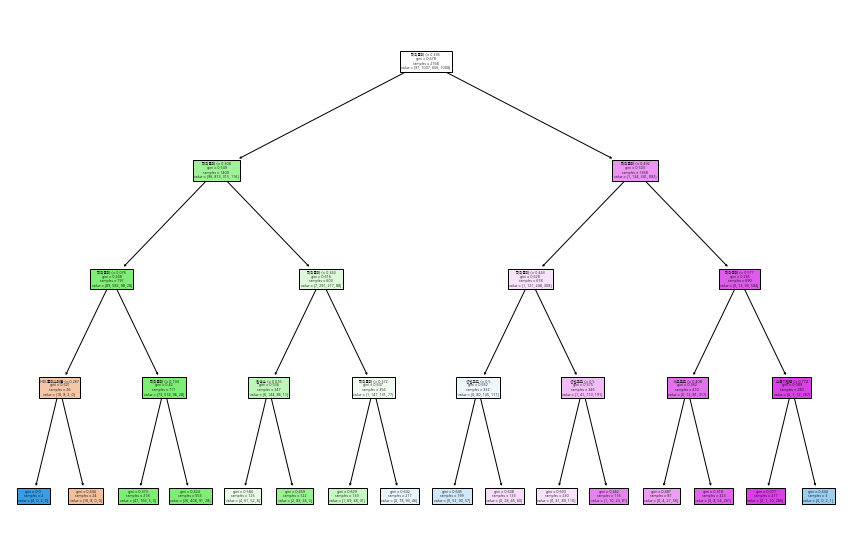

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(best_model['model'],feature_names=col_name, filled=True)
plt.show()

- 설명 변수 중요도

지금 만든 모델에서 bmi에 따른 비만도에 어떤 Feature가 가장 영향을 미치는지

In [ ]:
df_importance = pd.DataFrame()
df_importance['Feature']=col_name
df_importance['importance']= best_model['model'].feature_importances_

In [ ]:
order_list = df_importance.sort_values(by='importance',ascending=False).head(5)['Feature'].tolist()

-> importance 값이 높은 상위 5개 Feature 리스트

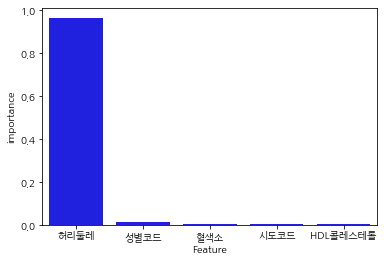

In [ ]:
sns.barplot(data=df_importance, x='Feature', y= 'importance', color='b',order=order_list)

-> 비만도의 가장 영향을 미치는 변수는 허리둘레로 나왔다.

성별코드와 혈색소,시도코드,ALT도 데이터 분류의 약간의 영향을 미친 것을 알 수 있다.